# Контрольная точка №2.
# Булыгин Максим Евгеньвич, Э-1813
## Вариант 3 (филиалы).

# Ход работы:
* ### Первичная обработка данных
* ### Факторный анализ: метод главных компонент
* ### Кластеризация: иерархический кластерный анализ, kmeans
* ### Интерпретация и визуализация результатов

In [1]:
import numpy as np

In [3]:
a = np.array([1, 2, 3])
a * 2

array([2, 4, 6])

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing
%matplotlib inline
import scipy.stats as sps
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, set_link_color_palette

In C:\Games\anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Games\anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Games\anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Games\anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Games\anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.jpeg_quality rc

In [ ]:
from sklearn.metrics import m

# 1) Первичная обработка данных.

Импортируем данные.

In [7]:
data = pd.read_csv('Филиалы.dat', sep=";", encoding='cp1251', engine='python')
data

,НАЗВАНИЕ,ПЛОЩАДЬ,ПРОХОДИМ,АССОРТИМ,КОНКУРЕН,МЕТРО,КОНСУЛЬТ,ДИЗАЙН,ЦЕНЫ,ПРОДАЖИ
0,Филиал 1,120,42,миним,лучше,5,Есть,Вывеска,1.00,49000
1,Филиал 2,80,18,средний,одинак,20,Нет,Витрина,0.95,24000
2,Филиал 3,240,54,макс,одинак,10,Есть,Св+Ви,1.05,125000
3,Филиал 4,160,57,средний,одинак,30,Нет,Световая,1.00,85000
4,Филиал 5,270,68,широкий,лучше,15,Есть,Св+Ви,1.05,130000
5,Филиал 6,100,28,средний,одинак,10,Есть,Вывеска,0.95,42000
6,Филиал 7,130,20,средний,хуже,5,Есть,Бедно,1.00,40000
7,Филиал 8,310,66,макс,лучше,25,Есть,Св+Ви,0.90,153000
8,Филиал 9,140,38,средний,лучше,10,Нет,Св+Ви,1.00,60000
9,Филиал 10,170,42,широкий,одинак,5,Нет,Св+Ви,1.10,65000


Приведем к нижнему регистру названия столбцов.

In [8]:
data.columns = data.columns.str.lower()

Смотрим описательные статистики, форматы столбцов.

In [9]:
data.describe()

,площадь,проходим,метро,цены,продажи
count,20.000000,20.000000,20.000000,20.000000,20.000000
mean,163.500000,39.350000,15.250000,0.990000,62150.000000
std,64.585724,15.934983,9.101041,0.057583,38386.229713
min,80.000000,18.000000,5.000000,0.900000,22000.000000
25%,117.500000,27.000000,8.750000,0.950000,35000.000000
50%,150.000000,38.500000,15.000000,1.000000,45500.000000
75%,195.000000,54.250000,21.250000,1.000000,85250.000000
max,310.000000,68.000000,35.000000,1.100000,153000.000000


In [10]:
data.dtypes

название     object
площадь       int64
проходим      int64
ассортим     object
конкурен     object
метро         int64
консульт     object
дизайн       object
цены        float64
продажи       int64
dtype: object

По условию задачи, кластеризовать необходимо без учета переменной продажи, поэтому создаем новый dataframe без продаж. Также, удалим переменную навание - посколку, это просто порядковый номер филиала в таблице.

In [11]:
df = data.drop(columns=['название', 'продажи'])
df

,площадь,проходим,ассортим,конкурен,метро,консульт,дизайн,цены
0,120,42,миним,лучше,5,Есть,Вывеска,1.00
1,80,18,средний,одинак,20,Нет,Витрина,0.95
2,240,54,макс,одинак,10,Есть,Св+Ви,1.05
3,160,57,средний,одинак,30,Нет,Световая,1.00
4,270,68,широкий,лучше,15,Есть,Св+Ви,1.05
5,100,28,средний,одинак,10,Есть,Вывеска,0.95
6,130,20,средний,хуже,5,Есть,Бедно,1.00
7,310,66,макс,лучше,25,Есть,Св+Ви,0.90
8,140,38,средний,лучше,10,Нет,Св+Ви,1.00
9,170,42,широкий,одинак,5,Нет,Св+Ви,1.10


Много столбцов (а именно ассортим, конкурен, консульт, дизайн), являющихся тектовыми переменными. Необходима перекодировка и обработка данных.

Начнем с ассортимента.

Как видим, категиориальная переменная, принимающая четыре значения.

In [12]:
set(df['ассортим'])

{'макс   ', 'миним  ', 'средний', 'широкий'}

Сначала исправим лишние пробелы.

In [149]:
df['ассортим'] = df['ассортим'].str.replace(" ", "")

In [150]:
set(df['ассортим'])

{'макс', 'миним', 'средний', 'широкий'}

Закодируем с помощью дамми-переменных.

In [151]:
df = pd.concat([df.drop(columns=['ассортим']), pd.get_dummies('ассорт_' + df['ассортим'])], axis = 1)
df

,площадь,проходим,конкурен,метро,консульт,дизайн,цены,ассорт_макс,ассорт_миним,ассорт_средний,ассорт_широкий
0,120,42,лучше,5,Есть,Вывеска,1.00,0,1,0,0
1,80,18,одинак,20,Нет,Витрина,0.95,0,0,1,0
2,240,54,одинак,10,Есть,Св+Ви,1.05,1,0,0,0
3,160,57,одинак,30,Нет,Световая,1.00,0,0,1,0
4,270,68,лучше,15,Есть,Св+Ви,1.05,0,0,0,1
5,100,28,одинак,10,Есть,Вывеска,0.95,0,0,1,0
6,130,20,хуже,5,Есть,Бедно,1.00,0,0,1,0
7,310,66,лучше,25,Есть,Св+Ви,0.90,1,0,0,0
8,140,38,лучше,10,Нет,Св+Ви,1.00,0,0,1,0
9,170,42,одинак,5,Нет,Св+Ви,1.10,0,0,0,1


In [152]:
set(df['конкурен'])

{'лучше ', 'одинак', 'хуже  '}

In [ ]:
sklearn.model_selection.train_test_split()

Уберем лишние пробелы.

In [153]:
df['конкурен'] = df['конкурен'].str.replace(" ", "")

In [154]:
set(df['конкурен'])

{'лучше', 'одинак', 'хуже'}

Закодируем с помощью дамми-переменных.

In [155]:
df = pd.concat([df.drop(columns=['конкурен']), pd.get_dummies('конкур_' + df['конкурен'])], axis = 1)
df

,площадь,проходим,метро,консульт,дизайн,цены,ассорт_макс,ассорт_миним,ассорт_средний,ассорт_широкий,конкур_лучше,конкур_одинак,конкур_хуже
0,120,42,5,Есть,Вывеска,1.00,0,1,0,0,1,0,0
1,80,18,20,Нет,Витрина,0.95,0,0,1,0,0,1,0
2,240,54,10,Есть,Св+Ви,1.05,1,0,0,0,0,1,0
3,160,57,30,Нет,Световая,1.00,0,0,1,0,0,1,0
4,270,68,15,Есть,Св+Ви,1.05,0,0,0,1,1,0,0
5,100,28,10,Есть,Вывеска,0.95,0,0,1,0,0,1,0
6,130,20,5,Есть,Бедно,1.00,0,0,1,0,0,0,1
7,310,66,25,Есть,Св+Ви,0.90,1,0,0,0,1,0,0
8,140,38,10,Нет,Св+Ви,1.00,0,0,1,0,1,0,0
9,170,42,5,Нет,Св+Ви,1.10,0,0,0,1,0,1,0


Аналогично для консульт.

In [156]:
set(df['консульт'])

{'Есть', 'Нет '}

In [157]:
df['консульт'] = df['консульт'].str.replace(" ", "").str.lower()

In [158]:
set(df['консульт'])

{'есть', 'нет'}

In [159]:
df = pd.concat([df.drop(columns=['консульт']), pd.get_dummies('консульт_' + df['консульт'])], axis = 1)
df

,площадь,проходим,метро,дизайн,цены,ассорт_макс,ассорт_миним,ассорт_средний,ассорт_широкий,конкур_лучше,конкур_одинак,конкур_хуже,консульт_есть,консульт_нет
0,120,42,5,Вывеска,1.00,0,1,0,0,1,0,0,1,0
1,80,18,20,Витрина,0.95,0,0,1,0,0,1,0,0,1
2,240,54,10,Св+Ви,1.05,1,0,0,0,0,1,0,1,0
3,160,57,30,Световая,1.00,0,0,1,0,0,1,0,0,1
4,270,68,15,Св+Ви,1.05,0,0,0,1,1,0,0,1,0
5,100,28,10,Вывеска,0.95,0,0,1,0,0,1,0,1,0
6,130,20,5,Бедно,1.00,0,0,1,0,0,0,1,1,0
7,310,66,25,Св+Ви,0.90,1,0,0,0,1,0,0,1,0
8,140,38,10,Св+Ви,1.00,0,0,1,0,1,0,0,0,1
9,170,42,5,Св+Ви,1.10,0,0,0,1,0,1,0,0,1


Теперь дизайн.

In [160]:
set(df['дизайн'])

{'Бедно   ', 'Витрина ', 'Вы+Ви   ', 'Вывеска ', 'Св+Ви   ', 'Световая'}

In [161]:
df['дизайн'] = df['дизайн'].str.replace(" ", "").str.lower()

In [162]:
set(df['дизайн'])

{'бедно', 'витрина', 'вы+ви', 'вывеска', 'св+ви', 'световая'}

In [163]:
df["дизайн"].value_counts()
sklearn.metrics.mean_squared_error(y_true, y_pred)

св+ви       5
вывеска     4
витрина     4
бедно       3
вы+ви       3
световая    1
Name: дизайн, dtype: int64

Видим, что тут ситуация немного другая - всего три состояния: дизайн может быть световой, вывеска, витрина, а также любые их комбинации, а также отсутствие дизайна.

Закодируем вручную. Создадим 4 столбца - световая, вывеска, витрина, отсутствие.

In [164]:
for word in ['дизайн_световая', 'дизайн_вывеска', 'дизайн_витрина', 'дизайн_отсутствие']:
    df[word] = 0

In [165]:
for i in range(len(df)):
    if 'вы' in df['дизайн'].iloc[i]: # если есть вывеска
        df['дизайн_вывеска'].iloc[i] = 1
    if 'св' in df['дизайн'].iloc[i]: # если есть световая
        df['дизайн_световая'].iloc[i] = 1
    if 'ви' in df['дизайн'].iloc[i]: # если есть витрина
        df['дизайн_витрина'].iloc[i] = 1
    if 'бедно' == df['дизайн'].iloc[i]: # если нет никакого дизайна
        df['дизайн_отсутствие'].iloc[i] = 1

C:\Games\anaconda\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [166]:
df

,площадь,проходим,метро,дизайн,цены,ассорт_макс,ассорт_миним,ассорт_средний,ассорт_широкий,конкур_лучше,конкур_одинак,конкур_хуже,консульт_есть,консульт_нет,дизайн_световая,дизайн_вывеска,дизайн_витрина,дизайн_отсутствие
0,120,42,5,вывеска,1.00,0,1,0,0,1,0,0,1,0,0,1,0,0
1,80,18,20,витрина,0.95,0,0,1,0,0,1,0,0,1,0,0,1,0
2,240,54,10,св+ви,1.05,1,0,0,0,0,1,0,1,0,1,0,1,0
3,160,57,30,световая,1.00,0,0,1,0,0,1,0,0,1,1,0,0,0
4,270,68,15,св+ви,1.05,0,0,0,1,1,0,0,1,0,1,0,1,0
5,100,28,10,вывеска,0.95,0,0,1,0,0,1,0,1,0,0,1,0,0
6,130,20,5,бедно,1.00,0,0,1,0,0,0,1,1,0,0,0,0,1
7,310,66,25,св+ви,0.90,1,0,0,0,1,0,0,1,0,1,0,1,0
8,140,38,10,св+ви,1.00,0,0,1,0,1,0,0,0,1,1,0,1,0
9,170,42,5,св+ви,1.10,0,0,0,1,0,1,0,0,1,1,0,1,0


In [167]:
df = df.drop(columns=['дизайн'])

In [168]:
df

,площадь,проходим,метро,цены,ассорт_макс,ассорт_миним,ассорт_средний,ассорт_широкий,конкур_лучше,конкур_одинак,конкур_хуже,консульт_есть,консульт_нет,дизайн_световая,дизайн_вывеска,дизайн_витрина,дизайн_отсутствие
0,120,42,5,1.00,0,1,0,0,1,0,0,1,0,0,1,0,0
1,80,18,20,0.95,0,0,1,0,0,1,0,0,1,0,0,1,0
2,240,54,10,1.05,1,0,0,0,0,1,0,1,0,1,0,1,0
3,160,57,30,1.00,0,0,1,0,0,1,0,0,1,1,0,0,0
4,270,68,15,1.05,0,0,0,1,1,0,0,1,0,1,0,1,0
5,100,28,10,0.95,0,0,1,0,0,1,0,1,0,0,1,0,0
6,130,20,5,1.00,0,0,1,0,0,0,1,1,0,0,0,0,1
7,310,66,25,0.90,1,0,0,0,1,0,0,1,0,1,0,1,0
8,140,38,10,1.00,0,0,1,0,1,0,0,0,1,1,0,1,0
9,170,42,5,1.10,0,0,0,1,0,1,0,0,1,1,0,1,0


Текстовые переменные закодированы нулями и единицами. Теперь, необходима стандартизация данных (три варианта - приведение к отрезку [-1,1], отрезку [0,1] и стандартному распределению ($N(\mu, \sigma)$ с $\mu = 0$, $\sigma^2 = 1$). Так как текстовые фичи закодированы нулями и единичами, то будет разумным провести стандартизацию к отрезку [0,1].

In [169]:
df[['площадь', 'проходим', 'метро', 'цены']]

,площадь,проходим,метро,цены
0,120,42,5,1.00
1,80,18,20,0.95
2,240,54,10,1.05
3,160,57,30,1.00
4,270,68,15,1.05
5,100,28,10,0.95
6,130,20,5,1.00
7,310,66,25,0.90
8,140,38,10,1.00
9,170,42,5,1.10


In [170]:
scaler = MinMaxScaler()
scaler.fit(df[['площадь', 'проходим', 'метро', 'цены']])
df.iloc[:,:4] = scaler.transform(df[['площадь', 'проходим', 'метро', 'цены']])
df

,площадь,проходим,метро,цены,ассорт_макс,ассорт_миним,ассорт_средний,ассорт_широкий,конкур_лучше,конкур_одинак,конкур_хуже,консульт_есть,консульт_нет,дизайн_световая,дизайн_вывеска,дизайн_витрина,дизайн_отсутствие
0,0.173913,0.48,0.000000,0.50,0,1,0,0,1,0,0,1,0,0,1,0,0
1,0.000000,0.00,0.500000,0.25,0,0,1,0,0,1,0,0,1,0,0,1,0
2,0.695652,0.72,0.166667,0.75,1,0,0,0,0,1,0,1,0,1,0,1,0
3,0.347826,0.78,0.833333,0.50,0,0,1,0,0,1,0,0,1,1,0,0,0
4,0.826087,1.00,0.333333,0.75,0,0,0,1,1,0,0,1,0,1,0,1,0
5,0.086957,0.20,0.166667,0.25,0,0,1,0,0,1,0,1,0,0,1,0,0
6,0.217391,0.04,0.000000,0.50,0,0,1,0,0,0,1,1,0,0,0,0,1
7,1.000000,0.96,0.666667,0.00,1,0,0,0,1,0,0,1,0,1,0,1,0
8,0.260870,0.40,0.166667,0.50,0,0,1,0,1,0,0,0,1,1,0,1,0
9,0.391304,0.48,0.000000,1.00,0,0,0,1,0,1,0,0,1,1,0,1,0


Первый этап работы (первичная обработка и станартизация данных) выполнен. Можно переходить к факторному анализу.

# 2) Факторный анализ: метод главных компонент

In [171]:
df.shape

(20, 17)

Проверяем, что будет когда число главных компонент равно 17.

In [172]:
pca = PCA(n_components=17)
pca.fit(df)
pca_test = PCA(n_components=17)
pca_test.fit(df)

PCA(copy=True, iterated_power='auto', n_components=17, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

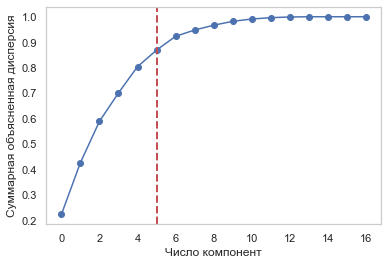

In [173]:
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_), marker='o')
plt.xlabel('Число компонент')
plt.ylabel('Суммарная объясненная дисперсия')
plt.grid(b=None)
plt.axvline(linewidth=2, color='r', linestyle = '--', x=5, ymin=0, ymax=1)
plt.show()

In [174]:
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Кумулята объясненой дисперсии'] = cvr
pca_df['Объясненная дисперсия данным фактором'] = evr
display(pca_df.head(10))

,Кумулята объясненой дисперсии,Объясненная дисперсия данным фактором
0,0.223578,0.223578
1,0.427244,0.203666
2,0.589189,0.161945
3,0.700826,0.111638
4,0.803953,0.103127
5,0.868942,0.064988
6,0.923038,0.054096
7,0.947825,0.024787
8,0.966648,0.018824
9,0.981911,0.015263


Из графика каменистой осыпи и кумуляту накопленной объясненной дисперсии и количества наблюдений, равного 20-ти, принимаем решение о том, что число главных компонент равно 5. В таком случае доля объясненной дисперсии равна 0.87, что является отличным показателем в случае использования метода главных компонент.

In [175]:
pca = PCA(n_components=5)
pca.fit(df)
df_factored = pd.DataFrame(pca.transform(df))

In [176]:
np.round(df_factored.describe().astype(float), 2)

,0,1,2,3,4
count,20.00,20.00,20.00,20.00,20.00
mean,-0.00,0.00,-0.00,0.00,0.00
std,0.84,0.80,0.71,0.59,0.57
min,-1.49,-1.12,-1.08,-0.93,-1.00
25%,-0.40,-0.73,-0.55,-0.39,-0.33
50%,0.02,-0.10,-0.03,-0.04,-0.06
75%,0.40,0.72,0.53,0.33,0.45
max,1.61,1.38,1.11,1.22,1.06


# 3) Кластерный анализ: kmeans, иерархический кластерный анализ

In [177]:
sil = []
k = range(2, 12)
for i in k:
    model = KMeans(n_clusters=i, random_state=54).fit(df_factored)
    sil.append(np.round(float(silhouette_score(df_factored, model.labels_)), 2))
    print(f'Значение меры качества silhouette для  {i} кластеров: {np.round(float(silhouette_score(df_factored, model.labels_)), 2)}')

Значение меры качества silhouette для  2 кластеров: 0.2
Значение меры качества silhouette для  3 кластеров: 0.23
Значение меры качества silhouette для  4 кластеров: 0.26
Значение меры качества silhouette для  5 кластеров: 0.31
Значение меры качества silhouette для  6 кластеров: 0.32
Значение меры качества silhouette для  7 кластеров: 0.3
Значение меры качества silhouette для  8 кластеров: 0.34
Значение меры качества silhouette для  9 кластеров: 0.35
Значение меры качества silhouette для  10 кластеров: 0.32
Значение меры качества silhouette для  11 кластеров: 0.3


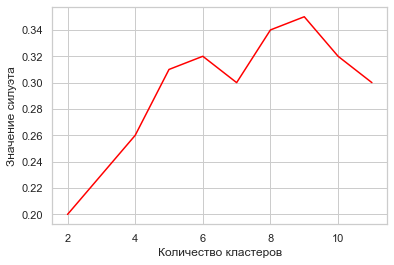

In [178]:
plt.plot(k, sil, color='red')
plt.xlabel("Количество кластеров")
plt.ylabel("Значение силуэта")
plt.show()

Исходя из значений силуэтта, кажется, что оптимальное число кластеров варьируется от 5 до 9. Однако, стоит вспомнить, что число наблюдений у нас равно 19 - в таком случае не хочется "переборщить" и разделить филиалы на слишком маленькие по количеству наблюдений группы. Кажется, что с увеличением числа кластеров увеличивается метрика силуэт, однако теряется смысл кластеризации в однродные группы и интерпретируемость кластеров. В связи с этим, посмотрим на каменистую осыпь, получаемую иерархическим кластерным анализом с межкластерным расстоянием варда и евклидовым расстоянием между наблюдениями.

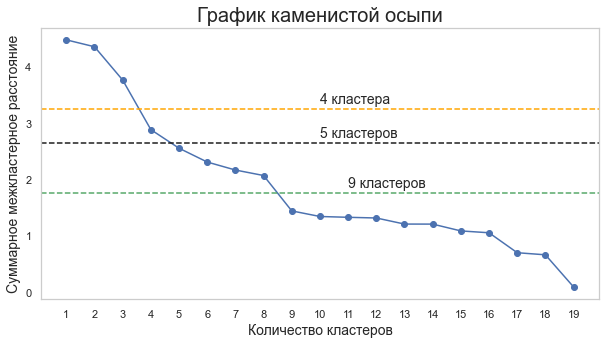

In [179]:
link = linkage(df_factored, 'ward', 'euclidean')
dist = link[:, 2]
plt.figure(figsize=(10,5));
plt.plot(list(map(str, list(range(1, len(dist) + 1)))), dist[::-1], marker='o')
plt.grid(b=None)
plt.axhline(2.65, c='k', linestyle='dashed')
plt.axhline(1.75, c='g', linestyle='dashed')
plt.axhline(3.25, c='orange', linestyle='dashed')
plt.text(9, 3.35, '4 кластера',fontsize=14)
plt.text(9, 2.75, '5 кластеров',fontsize=14)
plt.text(10, 1.85, '9 кластеров',fontsize=14)
plt.title('График каменистой осыпи',fontsize=20)
plt.xlabel('Количество кластеров', fontsize=14)
plt.ylabel('Суммарное межкластерное расстояние', fontsize=14)
plt.show()

Исходя из графика каменистой осыпи, с учетом того, что у нас число наблюдений равно 20, оптимальным числом кластеров выбираем либо 4 кластера, либо 5. Посмотрим в отдельности на дендрограммы при 4-х и 5-ти кластерах: 

Четыре кластера:

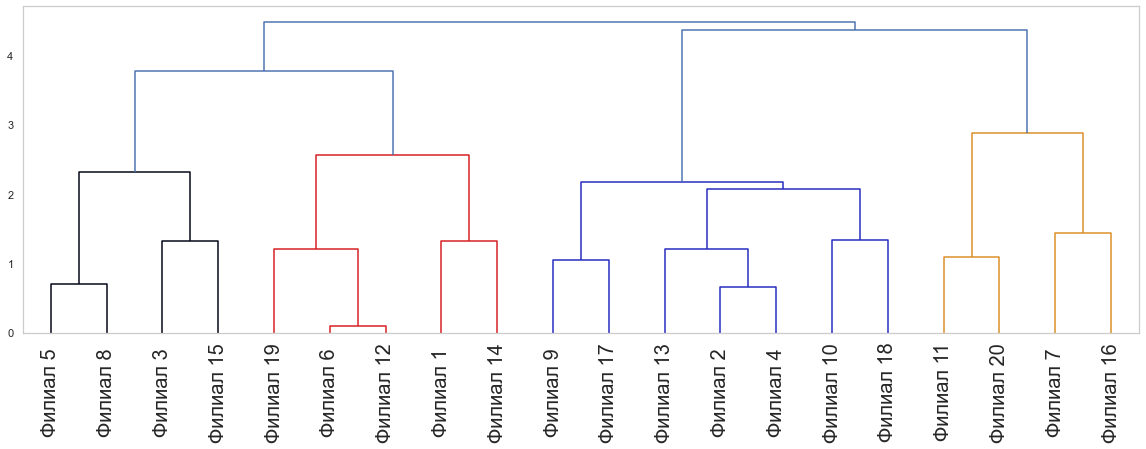

In [180]:
plt.figure(figsize=(20,6));
set_link_color_palette(["#030417", "#d61e21", "#242bbd","#db8d27"]),
dendrogram(link, color_threshold = 3.5,orientation='top',leaf_rotation=90,labels=data.название.tolist());
plt.grid(color='b', linestyle='-', linewidth=0.001)
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=20)
plt.show()

Пять кластеров:

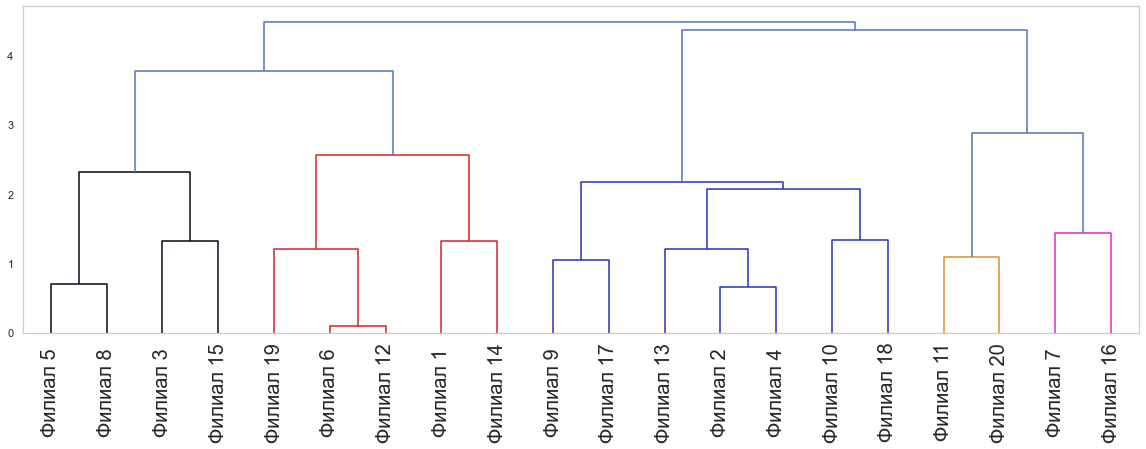

In [181]:
plt.figure(figsize=(20,6));
set_link_color_palette(["#030417", "#d61e21", "#242bbd","#db8d27", "#db27c3"]),
dendrogram(link, color_threshold = 2.65,orientation='top',leaf_rotation=90,labels=data.название.tolist());
plt.grid(color='b', linestyle='-', linewidth=0.001)
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=20)
plt.show()

Видим, что в от 4-х кластеров к 5-ти можно перейти, разбив последний кластер на две части. Посмотрим, разумно ли будет такое разбиение. Для этого, посмотрим на средние по фичам по кластерам в случае 5-ти и 4-х кластеров:

In [182]:
result = pd.concat([data.продажи, df], axis=1)
result

,продажи,площадь,проходим,метро,цены,ассорт_макс,ассорт_миним,ассорт_средний,ассорт_широкий,конкур_лучше,конкур_одинак,конкур_хуже,консульт_есть,консульт_нет,дизайн_световая,дизайн_вывеска,дизайн_витрина,дизайн_отсутствие
0,49000,0.173913,0.48,0.000000,0.50,0,1,0,0,1,0,0,1,0,0,1,0,0
1,24000,0.000000,0.00,0.500000,0.25,0,0,1,0,0,1,0,0,1,0,0,1,0
2,125000,0.695652,0.72,0.166667,0.75,1,0,0,0,0,1,0,1,0,1,0,1,0
3,85000,0.347826,0.78,0.833333,0.50,0,0,1,0,0,1,0,0,1,1,0,0,0
4,130000,0.826087,1.00,0.333333,0.75,0,0,0,1,1,0,0,1,0,1,0,1,0
5,42000,0.086957,0.20,0.166667,0.25,0,0,1,0,0,1,0,1,0,0,1,0,0
6,40000,0.217391,0.04,0.000000,0.50,0,0,1,0,0,0,1,1,0,0,0,0,1
7,153000,1.000000,0.96,0.666667,0.00,1,0,0,0,1,0,0,1,0,1,0,1,0
8,60000,0.260870,0.40,0.166667,0.50,0,0,1,0,1,0,0,0,1,1,0,1,0
9,65000,0.391304,0.48,0.000000,1.00,0,0,0,1,0,1,0,0,1,1,0,1,0


In [183]:
result['пять_кластеров'] = fcluster(link, 2.65, criterion='distance')
result['четыре_кластера'] = fcluster(link, 3.5, criterion='distance')

Средние для 4-х кластеров:

In [184]:
np.round(result.drop(columns=['пять_кластеров']).groupby('четыре_кластера').mean(), 2)

,продажи,площадь,проходим,метро,цены,ассорт_макс,ассорт_миним,ассорт_средний,ассорт_широкий,конкур_лучше,конкур_одинак,конкур_хуже,консульт_есть,консульт_нет,дизайн_световая,дизайн_вывеска,дизайн_витрина,дизайн_отсутствие
четыре_кластера,,,,,,,,,,,,,,,,,,
1,125750.00,0.82,0.87,0.46,0.38,0.75,0.0,0.00,0.25,0.50,0.50,0.00,1.0,0.0,0.75,0.25,1.00,0.00
2,41800.00,0.23,0.25,0.20,0.45,0.00,0.2,0.80,0.00,0.40,0.60,0.00,1.0,0.0,0.00,0.80,0.40,0.00
3,47857.14,0.27,0.37,0.33,0.50,0.00,0.0,0.57,0.43,0.29,0.57,0.14,0.0,1.0,0.43,0.14,0.86,0.00
4,49000.00,0.23,0.31,0.42,0.44,0.25,0.5,0.25,0.00,0.00,0.00,1.00,0.5,0.5,0.00,0.25,0.00,0.75


Средние показатели для 5-ти кластеров:

In [185]:
np.round(result.drop(columns=['четыре_кластера']).groupby('пять_кластеров').mean(), 2)

,продажи,площадь,проходим,метро,цены,ассорт_макс,ассорт_миним,ассорт_средний,ассорт_широкий,конкур_лучше,конкур_одинак,конкур_хуже,консульт_есть,консульт_нет,дизайн_световая,дизайн_вывеска,дизайн_витрина,дизайн_отсутствие
пять_кластеров,,,,,,,,,,,,,,,,,,
1,125750.00,0.82,0.87,0.46,0.38,0.75,0.0,0.00,0.25,0.50,0.50,0.00,1.0,0.0,0.75,0.25,1.00,0.0
2,41800.00,0.23,0.25,0.20,0.45,0.00,0.2,0.80,0.00,0.40,0.60,0.00,1.0,0.0,0.00,0.80,0.40,0.0
3,47857.14,0.27,0.37,0.33,0.50,0.00,0.0,0.57,0.43,0.29,0.57,0.14,0.0,1.0,0.43,0.14,0.86,0.0
4,35000.00,0.13,0.23,0.83,0.12,0.00,1.0,0.00,0.00,0.00,0.00,1.00,0.0,1.0,0.00,0.50,0.00,0.5
5,63000.00,0.33,0.39,0.00,0.75,0.50,0.0,0.50,0.00,0.00,0.00,1.00,1.0,0.0,0.00,0.00,0.00,1.0


С точки зрения интерпретации - лучше разбиение на пять кластеров, поскольку в таком случае 4-ый кластер разбивается на 4 и 5 соответственно, причем:
* по продажам 4-ый кластер хуже, чем 5-ый почти в два раза
* ассортимент больше и лучше у пятого кластера, чем у четвертого - поскольку у 4-го кластера минимальный ассортимент
* у них одинаковая переменная конкуренции
* у 4-го кластера нет консультанта, а у 5-го есть
* у 4-го кластера дизайн либо вывеска, либо отсутствует, а у 5-го дизайн точно отсутствует

Судя по всему, объединение 4 и 5 кластера в один может происходить из соображений одинаковой конкуренции и того, что у них обоих может отсутствовать дизайн.

Таким образом, оптимальным числом кластеров признаем число кластеров, равное пяти.

Теперь, когда мы определились с числом кластеров, сравним результаты кластеризации по методам kmeans и иерархического кластерного анализа.

In [189]:
comp = pd.DataFrame()
comp['hierarchical'] = fcluster(link, 2.65, criterion='distance')
comp['kmeans'] = KMeans(n_clusters=5, random_state=54).fit(df_factored).labels_

Посмотрим на кросс-таблицу:

In [190]:
tab = pd.crosstab(comp['hierarchical'], comp['kmeans'])
tab

kmeans,0,1,2,3,4
hierarchical,,,,,
1,0,0,1,3,0
2,0,0,5,0,0
3,0,7,0,0,0
4,0,0,0,0,2
5,2,0,0,0,0


Из таблицы видно, что результаты kmeans и иерархического кластерного анализа совпали в точности с точностью до одного наблюдения:
* 5 кластер иерарх.кластерного анализа соответствует 0 кластеру kmeans
* 4 кластер иерарх.кластерного анализа соответствует 4 кластеру kmeans
* 3 кластер иерарх.кластерного анализа соответствует 1 кластеру kmeans
* 2 кластер иерарх.кластерного анализа соответствует 2 кластеру kmeans
* 1 кластер иерарх.кластерного анализа соответствует 3 кластеру kmeans

Однако, одно наблюдение, признанное иерархическим кластерным анализом как 1 кластер, было признано kmeans как 2-ой кластер.

# 4) Интерпретация и визуализация результатов

Таблица средних по признакам:

In [191]:
final = pd.concat([result['пять_кластеров'], data[['продажи','площадь', 'проходим', 'метро', 'цены']], 
                   result.iloc[:,5:18]], axis=1).groupby('пять_кластеров').mean().reset_index()
final = np.transpose(final)
final.columns = ['Первый кластер', 'Второй кластер', 'Третий кластер', 'Четвертый кластер', 'Пятый кластер']
final = final.iloc[1:]
final

,Первый кластер,Второй кластер,Третий кластер,Четвертый кластер,Пятый кластер
продажи,125750.000,41800.00,47857.142857,35000.000,63000.00
площадь,267.500,134.00,142.857143,110.000,155.00
проходим,61.500,30.60,36.285714,29.500,37.50
метро,18.750,11.00,15.000000,30.000,5.00
цены,0.975,0.99,1.000000,0.925,1.05
ассорт_макс,0.750,0.00,0.000000,0.000,0.50
ассорт_миним,0.000,0.20,0.000000,1.000,0.00
ассорт_средний,0.000,0.80,0.571429,0.000,0.50
ассорт_широкий,0.250,0.00,0.428571,0.000,0.00
конкур_лучше,0.500,0.40,0.285714,0.000,0.00


Лог-шкалированная по оси абсцисс гистограмма  средних по признакам:

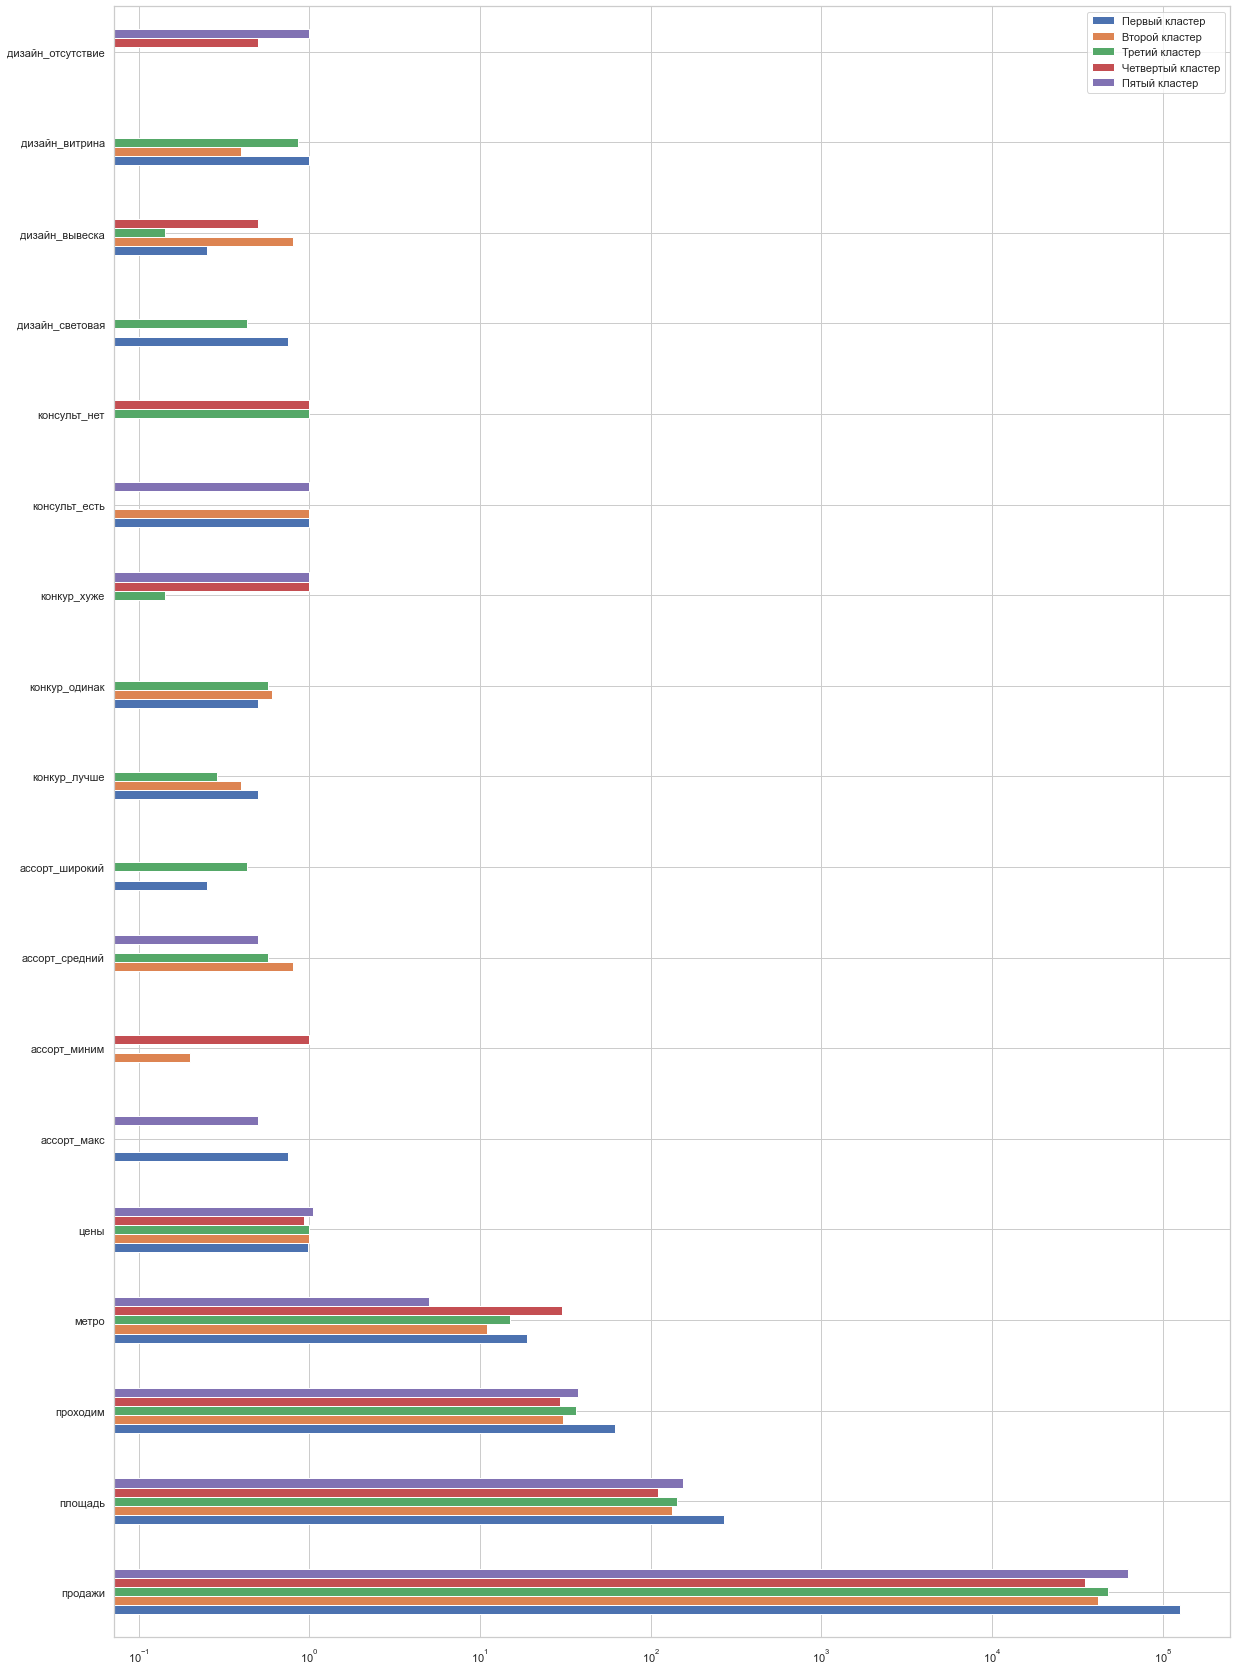

In [192]:
final.plot.barh(figsize=(20,30),log = True);

Нормализованные средние значения по признакам в кластерах:

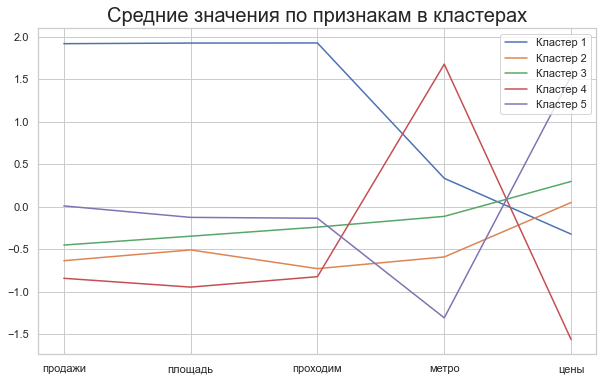

In [230]:
p = np.transpose(final)
scaler = StandardScaler().fit(p)
p_plot = scaler.transform(p)
p_plot
plt.figure(figsize=(10, 6))
plt.plot(p.columns[:5], p_plot[0,:5], label='Кластер 1')
plt.plot(p.columns[:5], p_plot[1,:5], label='Кластер 2')
plt.plot(p.columns[:5], p_plot[2,:5], label='Кластер 3')
plt.plot(p.columns[:5], p_plot[3,:5], label='Кластер 4')
plt.plot(p.columns[:5], p_plot[4,:5], label='Кластер 5')
plt.title('Cредние значения по признакам в кластерах', fontsize=20)
plt.legend()
plt.show();

### Визуализация пяти кластеров в главных компонентах:

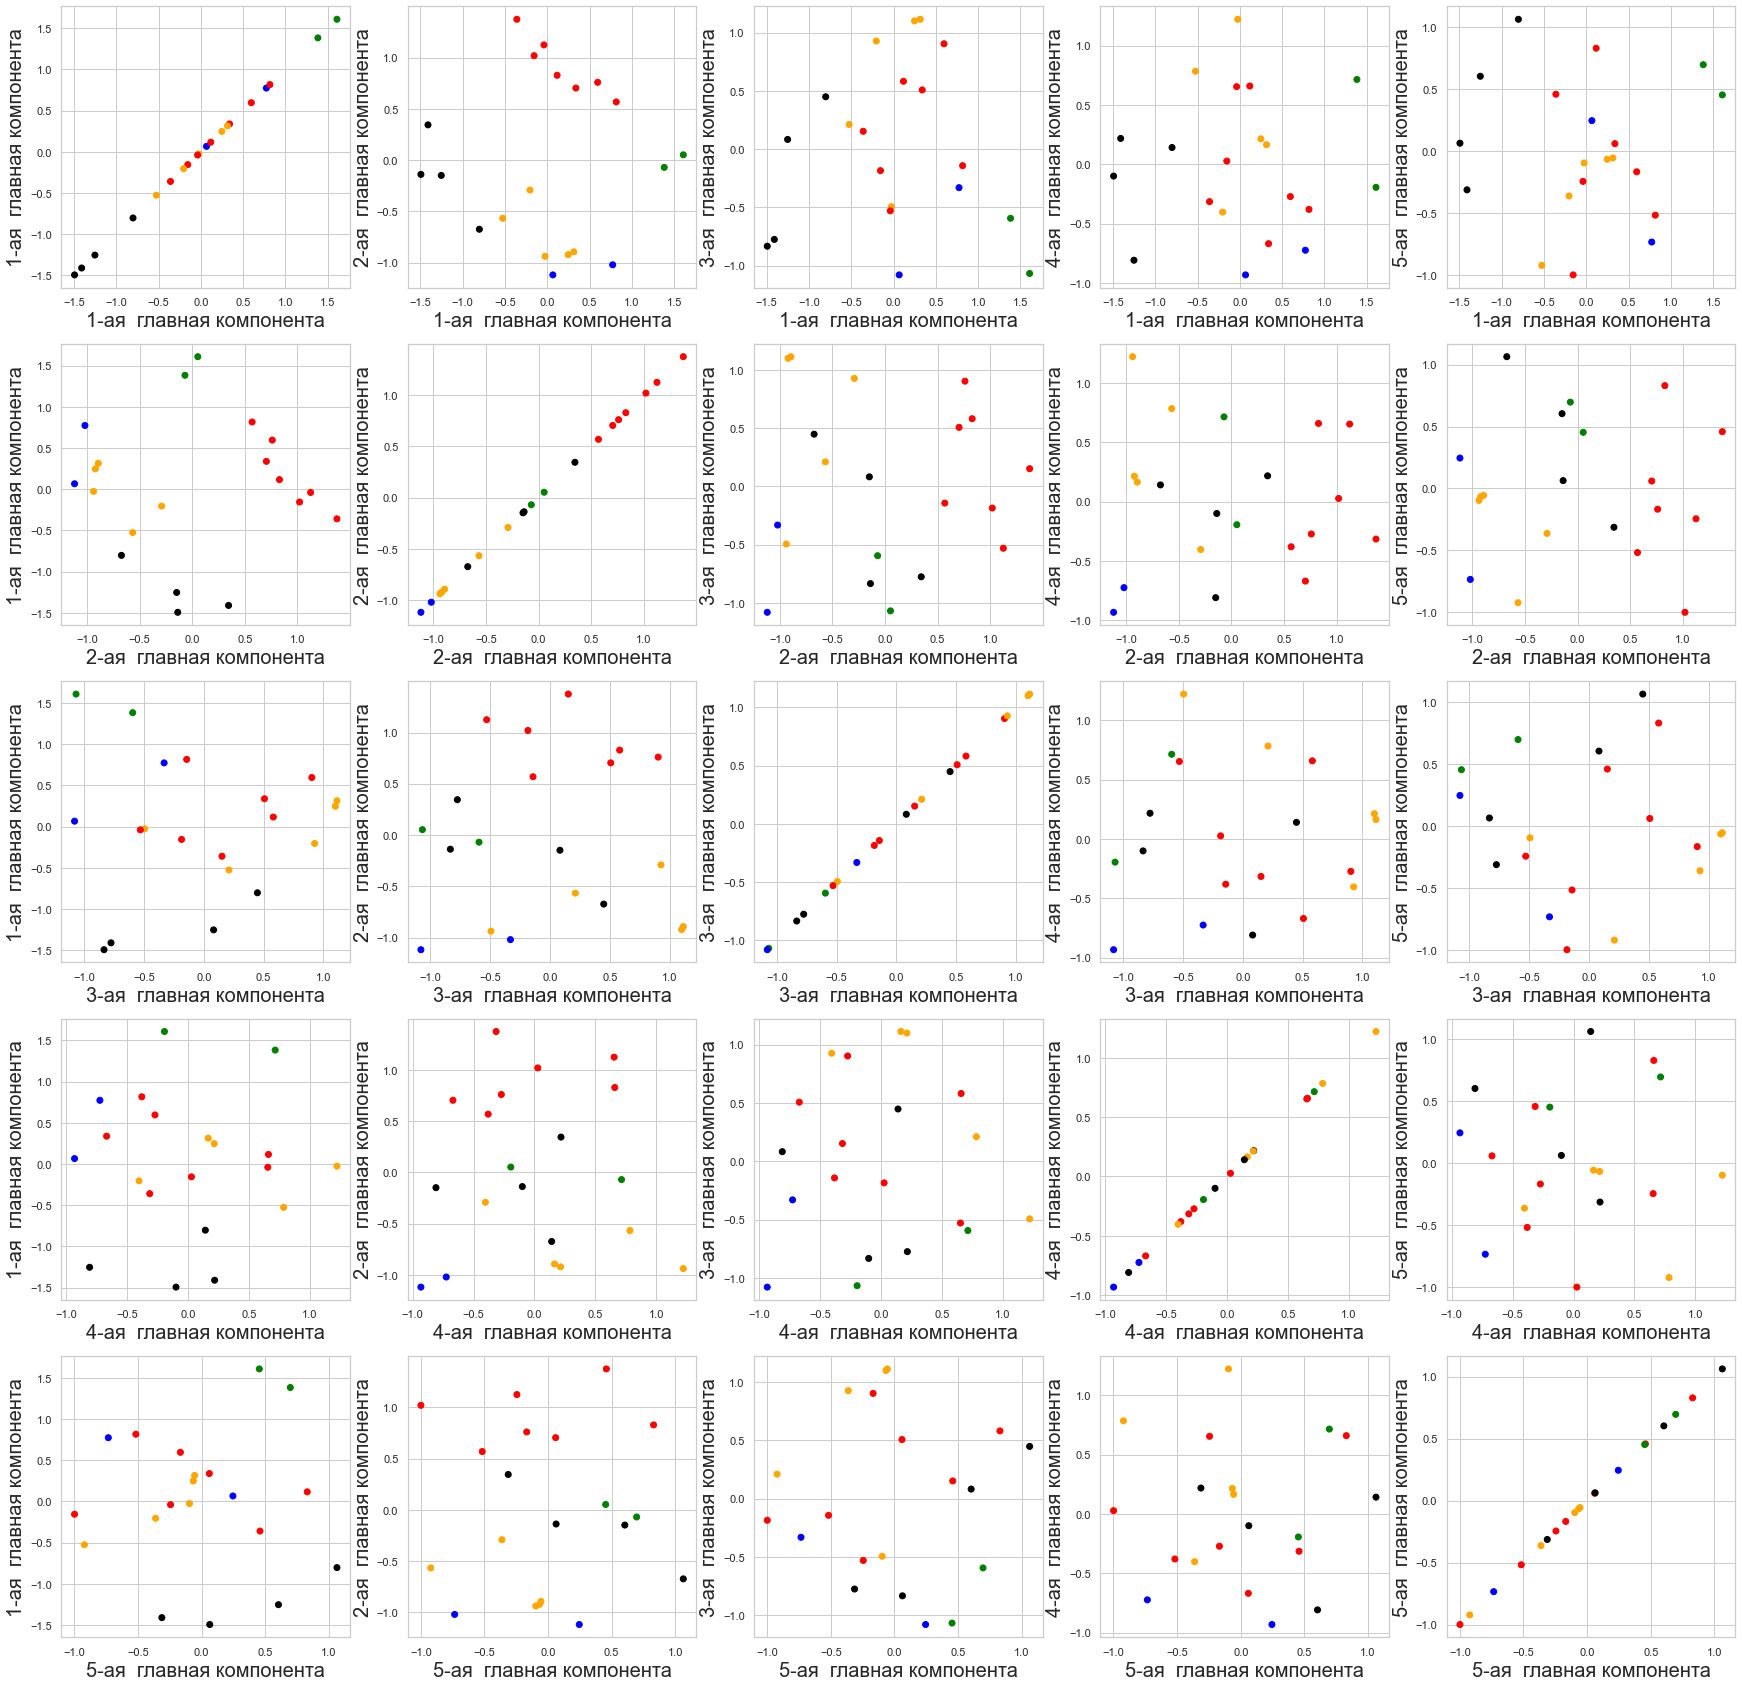

In [193]:
с = ['black','orange', 'red','green','blue']
colors = [с[j - 1] for j in result['пять_кластеров']]
fig, axs = plt.subplots(5, 5, figsize=(30,30))
for i in range(5):
    for j in range(5):
        axs[i, j].scatter(df_factored.values[:, i], df_factored.values[:, j], c=colors)
        axs[i, j].set_xlabel(f"{i + 1}-ая  главная компонента", fontsize=20)
        axs[i, j].set_ylabel(f"{j + 1}-ая  главная компонента", fontsize=20);

### Визуализация пяти кластеров в площади, проходимости, доступности метро, продажах и индексе цен:

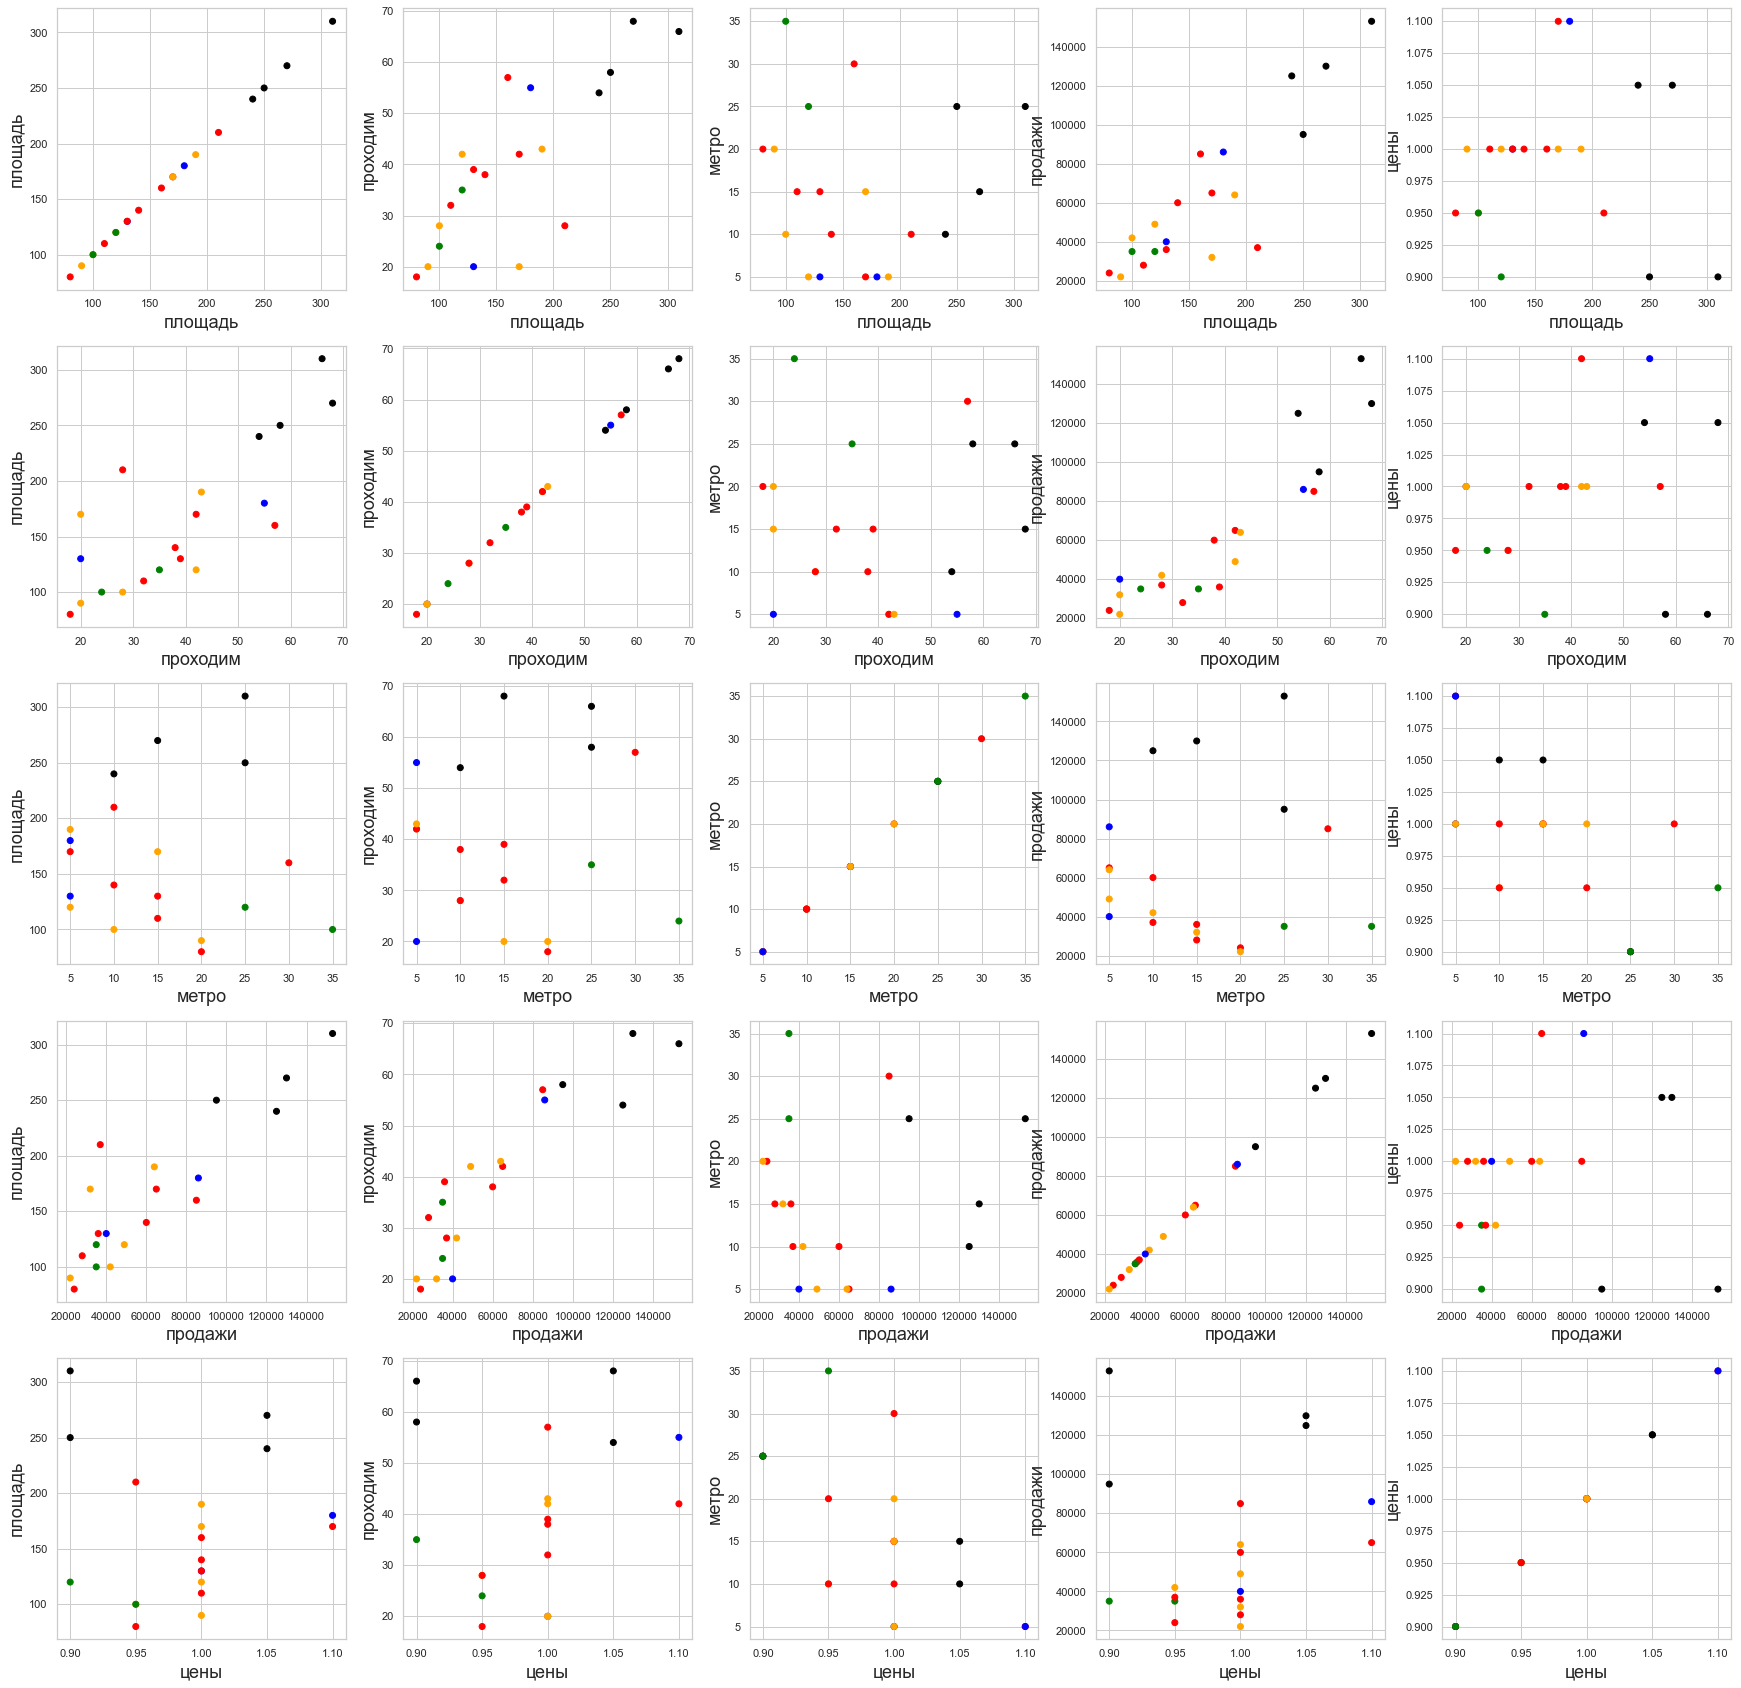

In [196]:
d = data[['площадь', 'проходим', 'метро', 'продажи', 'цены']]
fig, axs = plt.subplots(5, 5, figsize=(30,30))
for i in range(5):
    for j in range(5):
        axs[i, j].scatter(d.values[:, i], d.values[:, j], c=colors)
        axs[i, j].set_xlabel(d.columns[i], fontsize=18)
        axs[i, j].set_ylabel(d.columns[j], fontsize=18);

Из скаттер-плоттов выше видно, что в осях главных компонент группы получились довольно однородными, в то время как в осях площадь-проходимость-метро-продажи-цены, это не совсем так. Получилось это так, потому что при проведении кластеризации был проведен факторный анализ, который позволил рассмотреть категориальные переменные (в то время как в условии рекомендовалось их отбросить из рассмотрения). Очевидно, если бы кластеризация проводилась изначально по этим 4-м (поскольку цена была бы отброшена) признакам, то результаты были бы другие.

### Интерпретация:

В ходе кластерного анализа было выделено 5 однородных групп филиалов:
1. Первая группа филиалов - это филиалы с максимальными продажами (125750 продаж в среднем), которые обладают огромными показателями площади (267 кв.м. в среднем), проходимости (62 человека в среднем), у них относительно рядом находится метро (в среднем 19 минут до метро), у них максимальный и широкий ассортимент, также во всех этих филиалах консултанты, и у всех них есть витрина в качестве дизайна, почти у всех них есть световой дизайн, находятся эти филиалы в среднем в ~20 минутах от метро.


2. Вторая группа филиалов - это филиалы, обладающие в среднем в три раза меньшими продажами (в среднем 41800 продаж), чем первый кластер, у них есть дизайн и консультанты, они обладают средним ассортиментом и довольно средними относительно других филиалов, кроме первого кластера, показателями площади (в среднем 134 кв.м.), у них относительно быстрая доступность до метро (в среднем 11 минут).


3. Третья группа филиалов - это филиалы, обладающие в среднем чуть меньше, чем в три раза меньшими продажами (в среднем ~48000 продаж), чем первый кластер, у них есть дизайн, причем приемущественно витринный, совсем нет консультантов, они обладают средне-широким ассортиментом и довольно средними относительно других филиалов, кроме первого кластера, показателями площади (в среднем 142 кв.м.), находятся эти филиалы в среднем в ~15 минутах от метро.


4. Четвертая группа филиалов - это филиалы, обладающие минимальными относительно других филиалов продажами (в среднем 35000 продаж), у них либо есть только вывеска как элемент дизайна, либо дизайна совсем нет, также совсем нет консультантов, они обладают минимальным ассортиментом и минимальными относительно других филиалов плошади (в среднем 110 кв.м.), находятся эти филиалы максимально далеко от метро (~полчаса) относительно других филиалов.


5. Пятая группа филиалов - это филиалы, обладающие максимальными, за исключением филиалов первой группы, продажами (в среднем ~60000 продаж), чем первый кластер, у них абсолютно нет никакого дизайна, есть консультанты, они обладают средне-максимальным ассортиментом и максимальными, за исключением первого кластера, показателями площади (в среднем 155 кв.м.), находятся эти филиалы прямо у метро - в пяти минутах ходьбы в среднем.

Другими словами, можно сказать что:

1. Первый кластер - филиалы-гиганты (огромные продажи, огромные площади, огромный ассортимент и т.д.), а поскольку они очень большие, то находятся относительно далеко от метро (поскольку снимать огромную площадь у метро невыгодно)


2. Второй кластер - филиалы-среднячки, которые находятся в пешей доступности от метро, обладают средним ассортиментом, дизайн - преимущественно вывеска.

3. Третий кластер - филилы-среднячки, которые находятся в чуть большей пешей доступности от метро, обладают средне-широким ассортиментом, и большим, по сравнению с 2 кластером площадью,  дизайн - преимущественно витрина. Видимо, это филиалы, который располагаются в ТЦ и привлекают покупателей вывеской.

4. Четвертый кластер - филиалы-новички-малыши, которые находятся очень далеко от метро, обладают минимальными средними продажами, обладают низким ассортиментом и минимальной среди других филиалов плошадью, нет консультантов и либо отсутствует дизайн, либо одна вывеска. Судя по всему, это филиалы, расположенные в спальных районах, прямо в жилом здании-многоэтажке, возможно, часть этих филиалов - это начинающие ИП.

5. Пятый кластер - это филиалы, расположенные прямо у метро (~5 минут), обладающие всеми средними относительно других филиалов показателями (в т.ч. продажами - 63000 в среднем), у всех этих филиалов отсутствует какой-либо дизайн. Судя по всему, раз это филиалы расположенные у метро, это какие-то кофейни, кондитерские, товары быстрой необходимости - в эти магазины люди заходят без приглашения, как только выходят из метро (поскольку вывесок и витрин даже нет).